In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import pickle
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Label: forest


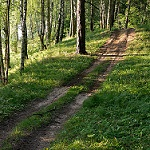

In [2]:
# import images from ../../Resources/resized_images.pkl file
images = pickle.load(open("../../Resources/resized_images.pkl", "rb"))

# import labels from ../../Resources/labels.pkl file
labels = pickle.load(open("../../Resources/labels.pkl", "rb"))

#show first image and its label
print(f"Label: {labels.iloc[0]}")
images[0]

In [3]:
print(labels)

0       forest
1       forest
2       forest
3       forest
4       forest
         ...  
2779       sea
2780       sea
2781       sea
2782       sea
2783       sea
Name: label, Length: 17034, dtype: object


In [4]:
# perform augmentation on one image
# create a pixel array from the image
image = images[0]
image_pxl_array = np.array(image)

#print pixel values
print(image_pxl_array)


[[[184 195 127]
  [128 139  70]
  [152 166  89]
  ...
  [106 115  72]
  [120 116  78]
  [ 74  66  29]]

 [[216 224 164]
  [127 138  72]
  [137 149  77]
  ...
  [138 145 104]
  [128 126  88]
  [126 121  83]]

 [[166 170 120]
  [117 125  68]
  [ 85  94  31]
  ...
  [101 107  73]
  [ 59  59  23]
  [ 79  75  38]]

 ...

 [[ 55  53  38]
  [ 54  57  40]
  [ 52  61  40]
  ...
  [ 36  63  22]
  [ 30  56  17]
  [ 36  64  24]]

 [[ 63  65  43]
  [ 57  62  39]
  [ 54  67  41]
  ...
  [ 48  79  37]
  [ 65  98  55]
  [ 44  80  36]]

 [[ 62  66  39]
  [ 54  63  34]
  [ 28  41  13]
  ...
  [ 59  92  49]
  [ 48  84  40]
  [ 43  80  36]]]


In [5]:
# Convert all images to a floating point numpy array for augmentation
imgs_pxl_array = np.array(images).astype('float32')

# Since pixel values are ranging from 0-255, normaize it by dividing by 255
normalized_images = [img / 255 for img in imgs_pxl_array]

# Print out the first image values
print(normalized_images[0])

[[[0.72156864 0.7647059  0.49803922]
  [0.5019608  0.54509807 0.27450982]
  [0.59607846 0.6509804  0.34901962]
  ...
  [0.41568628 0.4509804  0.28235295]
  [0.47058824 0.45490196 0.30588236]
  [0.2901961  0.25882354 0.11372549]]

 [[0.84705883 0.8784314  0.6431373 ]
  [0.49803922 0.5411765  0.28235295]
  [0.5372549  0.58431375 0.3019608 ]
  ...
  [0.5411765  0.5686275  0.40784314]
  [0.5019608  0.49411765 0.34509805]
  [0.49411765 0.4745098  0.3254902 ]]

 [[0.6509804  0.6666667  0.47058824]
  [0.45882353 0.49019608 0.26666668]
  [0.33333334 0.36862746 0.12156863]
  ...
  [0.39607844 0.41960785 0.28627452]
  [0.23137255 0.23137255 0.09019608]
  [0.30980393 0.29411766 0.14901961]]

 ...

 [[0.21568628 0.20784314 0.14901961]
  [0.21176471 0.22352941 0.15686275]
  [0.20392157 0.23921569 0.15686275]
  ...
  [0.14117648 0.24705882 0.08627451]
  [0.11764706 0.21960784 0.06666667]
  [0.14117648 0.2509804  0.09411765]]

 [[0.24705882 0.25490198 0.16862746]
  [0.22352941 0.24313726 0.15294118]


In [6]:
# Create an image augmentation pipeline
image_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomFlip('horizontal_and_vertical')     # Random horizontal and vertical flip
])

In [7]:
# Encode labels and prepare X and y

y_encoder = LabelEncoder().fit(labels)
y = y_encoder.transform(labels)

X = np.array(normalized_images)

In [8]:
# Split the data into training and testing sets with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=38)

In [9]:
# Create an empty list for X and y augmentations
X_train_aug = []
y_train_aug = []

# Loop through the entire X_train set
for i in range(len(X_train)):
    # Select the original image and its y label
    img = X_train[i]
    label = y_train[i]

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 4 new images for every original
    for j in range(5):
        # Create and append the image
        X_train_aug.append(image_augmentation(img, training=True)[0].numpy())
        # Append the original label
        y_train_aug.append(label)

# Print the length of the augmented images and the labels
print(len(X_train_aug))
print(len(y_train_aug))

68135
68135


In [10]:
# set ulimit to 12G to deal with large data export
!ulimit -n 12288

In [11]:
# Export the augmented images and labels in pickle files
pickle.dump(y_train_aug, 
            open("../../Resources/y_train_aug.pkl", "wb"), 
            protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(X_train_aug, 
            open("../../Resources/X_train_aug.pkl", "wb"), 
            protocol=pickle.HIGHEST_PROTOCOL)

